# 1. Defining Problem Statement and Analysing Basic Metrics

### Problem Statement: Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

### Analysis of Basic Metrics:

In [1]:
import sys as s
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/vidish/Desktop/netflix.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The Dataframe contains 12 columns and the datatypes of each column is as shown above in the "Dtype" column.
The data cleaning needs to be done such that the information in "cast", "director", "listed_in" is separated which would make the analysis easy. Also, the data in the "duration" column needs to be normalised. In order to achive this, 2 separated dataframes for Movies and TV Shows need to be created.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [4]:
# changing the data in the "date_added" column to date format
df["date_added"] = pd.to_datetime(df["date_added"], format = "mixed")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# creating a separate dataframe for cast
cast_filter = df["cast"].apply(lambda x: str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast_filter, index = df["title"])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[["title", 0]]
df_cast.columns = ["title", "cast"]
df_cast.head(5)

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [6]:
# creating a separate dataframe for directors
director_filter = df["director"].apply(lambda x: str(x).split(", ")).tolist()
df_director = pd.DataFrame(director_filter, index = df["title"])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace = True)
df_director = df_director[["title", 0]]
df_director.columns = ["title", "directors"]
df_director.head(5)

,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [7]:
# creating a speparate dataframe for country
country_filter = df["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(country_filter, index = df["title"])
df.country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[["title", 0]]
df_country.columns = ["title", "country"]
df_country.head(5)

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_26499/3993868994.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.country = df_country.stack()


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [8]:
# creating a separate dataframe for listed_in and renaming the column as "genre"
genre_filter = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(genre_filter, index = df["title"])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace = True)
df_genre = df_genre[["title", 0]]
df_genre.columns = ["title", "genre"]
df_genre.head(5)

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [9]:
# merging df_cast and df_director
df_cast_director = df_cast.merge(df_director, how = "left", on = "title")
df_cast_director.head(5)

,title,cast,directors
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan


In [10]:
# merging df_cast and df_country
df_cast_country = df_cast.merge(df_country, how = "left", on = "title")
df_cast_country.head(5)

,title,cast,country
0,Dick Johnson Is Dead,nan,United States
1,Blood & Water,Ama Qamata,South Africa
2,Blood & Water,Khosi Ngema,South Africa
3,Blood & Water,Gail Mabalane,South Africa
4,Blood & Water,Thabang Molaba,South Africa


In [11]:
# merging df_cast and df_genre
df_cast_genre = df_cast.merge(df_genre, how = "left", on = "title")
df_cast_genre.head(5)

,title,cast,genre
0,Dick Johnson Is Dead,nan,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows


In [12]:
# merging df_director and df_country
df_director_country = df_director.merge(df_country, how = "left", on = "title")
df_director_country.head(5)

,title,directors,country
0,Dick Johnson Is Dead,Kirsten Johnson,United States
1,Blood & Water,nan,South Africa
2,Ganglands,Julien Leclercq,nan
3,Jailbirds New Orleans,nan,nan
4,Kota Factory,nan,India


In [13]:
# merging df_director and df_genre
df_director_genre = df_director.merge(df_genre, how = "left", on = "title")
df_director_genre.head(5)

,title,directors,genre
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries
1,Blood & Water,nan,International TV Shows
2,Blood & Water,nan,TV Dramas
3,Blood & Water,nan,TV Mysteries
4,Ganglands,Julien Leclercq,Crime TV Shows


In [14]:
# merging df_country and df_genre
df_country_genre = df_country.merge(df_genre, how = "left", on = "title")
df_country_genre.head(5)

,title,country,genre
0,Dick Johnson Is Dead,United States,Documentaries
1,Blood & Water,South Africa,International TV Shows
2,Blood & Water,South Africa,TV Dramas
3,Blood & Water,South Africa,TV Mysteries
4,Ganglands,nan,Crime TV Shows


In [15]:
# merging df_cast_director and df_country
df_cast_director_country = df_cast_director.merge(df_country, how = "left", on = "title")
df_cast_director_country.head(5)

,title,cast,directors,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States
1,Blood & Water,Ama Qamata,nan,South Africa
2,Blood & Water,Khosi Ngema,nan,South Africa
3,Blood & Water,Gail Mabalane,nan,South Africa
4,Blood & Water,Thabang Molaba,nan,South Africa


In [16]:
# merging df_cast_director and df_genre
df_cast_director_genre = df_cast_director.merge(df_genre, how = "left", on = "title")
df_cast_director_genre.head(5)

,title,cast,directors,genre
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,nan,International TV Shows
2,Blood & Water,Ama Qamata,nan,TV Dramas
3,Blood & Water,Ama Qamata,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,International TV Shows


In [17]:
# merging df_cast_director_country and df_genre
df_cast_director_country_genre = df_cast_director_country.merge(df_genre, how = "left", on = "title")
df_cast_director_country_genre.head(5)

,title,cast,directors,country,genre
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows


In [18]:
# dropping the cast, director, country, and genre (listed_in) columns df (the original DataFrame)
df_dropped = df.drop(["cast", "director", "country", "listed_in"], axis = 1)
df_dropped.head(5)

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...


In [19]:
# merging df and df_cast_director_country_genre to create a new dataframe "df_new"
df_new = df_cast_director_country_genre.merge(df_dropped, how = "left", on = "title")
df_new.head(5)

,title,cast,directors,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161216 entries, 0 to 161215
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         161216 non-null  object        
 1   cast          161216 non-null  object        
 2   directors     161216 non-null  object        
 3   country       161216 non-null  object        
 4   genre         161216 non-null  object        
 5   show_id       161216 non-null  object        
 6   type          161216 non-null  object        
 7   date_added    161058 non-null  datetime64[ns]
 8   release_year  161216 non-null  int64         
 9   rating        161149 non-null  object        
 10  duration      161213 non-null  object        
 11  description   161216 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 14.8+ MB


In [21]:
# dropping the show_id and description columns as they are not needed
df_new = df_new.drop(["show_id", "description"], axis = 1)
df_new.head(5)

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90 min
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [22]:
# creating seperate dataframes for movies and tv shows
df_movies = df_new[df_new["type"] == "Movie"]
df_tv = df_new[df_new["type"] == "TV Show"]

In [23]:
df_movies.head(5)

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90 min
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91 min
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91 min
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91 min
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91 min


In [24]:
df_tv.head(5)

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons
5,Blood & Water,Khosi Ngema,nan,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [25]:
# formatting the "duration" column in df_movies
duration_movies_filter = df_movies["duration"].apply(lambda x: str(x).split(" ")).tolist()
df_movies_duration = pd.DataFrame(duration_movies_filter, index = df_movies["title"])
df_movies_duration = pd.DataFrame(df_movies_duration)
df_movies_duration = df_movies_duration.drop([1], axis = 1)
df_movies_duration = df_movies_duration.reset_index()
df_movies_duration = df_movies_duration[["title", 0]]
df_movies_duration.columns = ["title", "duration_in_min"]
df_movies_duration["duration_in_min"] = pd.to_numeric(df_movies_duration["duration_in_min"],errors="coerce")
df_movies_duration["duration_in_min"] = df_movies_duration["duration_in_min"].fillna(0).astype(int)
df_movies = df_movies.merge(df_movies_duration, how = "left", on = "title")
df_movies = df_movies.drop(["duration"], axis = 1)
df_movies["duration_in_min"] = df_movies["duration_in_min"].astype(int)
df_movies.head(5)

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration_in_min
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90
1,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91
2,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91
3,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91
4,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies,Movie,2021-09-24,2021,PG,91


In [26]:
# formatting the "duration" column in df_tv
duration_tv_filter = df_tv["duration"].apply(lambda x: str(x).split(" ")).tolist()
df_tv_duration = pd.DataFrame(duration_tv_filter, index = df_tv["title"])
df_tv_duration = pd.DataFrame(df_tv_duration)
df_tv_duration = df_tv_duration.drop([1], axis = 1)
df_tv_duration = df_tv_duration.reset_index()
df_tv_duration = df_tv_duration[["title", 0]]
df_tv_duration.columns = ["title", "duration_in_seasons"]
df_tv_duration["duration_in_seasons"] = pd.to_numeric(df_tv_duration["duration_in_seasons"],errors="coerce")
df_tv_duration["duration_in_seasons"] = df_tv_duration["duration_in_seasons"].fillna(0).astype(int)
df_tv = df_tv.merge(df_tv_duration, how = "left", on = "title")
df_tv = df_tv.drop(["duration"], axis = 1)
df_tv["duration_in_seasons"] = df_tv["duration_in_seasons"].astype(int)
df_tv.head(5)

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration_in_seasons
0,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2
2,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2
3,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2
4,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2


### Data Types of all the attributes

In [27]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702309 entries, 0 to 3702308
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   title            object        
 1   cast             object        
 2   directors        object        
 3   country          object        
 4   genre            object        
 5   type             object        
 6   date_added       datetime64[ns]
 7   release_year     int64         
 8   rating           object        
 9   duration_in_min  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 282.5+ MB


In [28]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745093 entries, 0 to 1745092
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   title                object        
 1   cast                 object        
 2   directors            object        
 3   country              object        
 4   genre                object        
 5   type                 object        
 6   date_added           datetime64[ns]
 7   release_year         int64         
 8   rating               object        
 9   duration_in_seasons  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 133.1+ MB


### Stastical Summary

In [29]:
df_movies.describe(include = "all")

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration_in_min
count,3702309,3702309,3702309,3702309,3702309,3702309,3702309,3.702309e+06,3702256,3.702309e+06
unique,6131,25952,4778,83,20,1,NaN,NaN,17,NaN
top,Movie 43,Radhika Apte,Akiva Schaffer,United States,Comedies,Movie,NaN,NaN,TV-MA,NaN
freq,219024,11389,33250,1466681,796190,3702309,NaN,NaN,1309713,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-25 17:22:25.042026752,2.012475e+03,NaN,1.070585e+02
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1.942000e+03,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-13 00:00:00,2.011000e+03,NaN,9.400000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-15 00:00:00,2.015000e+03,NaN,1.040000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 00:00:00,2.018000e+03,NaN,1.200000e+02
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2.021000e+03,NaN,3.120000e+02


In [30]:
df_tv.describe(include = "all")

,title,cast,directors,country,genre,type,date_added,release_year,rating,duration_in_seasons
count,1745093,1745093,1745093,1745093,1745093,1745093,1741177,1.745093e+06,1742961,1.745093e+06
unique,2676,14864,300,60,22,1,NaN,NaN,9,NaN
top,Navarasa,Hsia Teng-hung,nan,United States,International TV Shows,TV Show,NaN,NaN,TV-MA,NaN
freq,39204,4455,1381059,353586,437738,1745093,NaN,NaN,1121876,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-05 00:13:56.024826112,2.017429e+03,NaN,1.998202e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-02-04 00:00:00,1.925000e+03,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-30 00:00:00,2.017000e+03,NaN,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-06 00:00:00,2.019000e+03,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22 00:00:00,2.020000e+03,NaN,2.000000e+00
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,2.021000e+03,NaN,1.700000e+01


# 3. Non-Graphical Analysis: Value Counts and Unique Attributes

### Unique Attributes

In [31]:
timeline_start = df_new["date_added"].min()
timeline_end = df_new["date_added"].max()
print(f"The timeline of the given Netflix data is for the shows from {timeline_start} to {timeline_end}")
timeline_start_movies = df_movies["date_added"].min()
timeline_end_movies = df_movies["date_added"].max()
print(f"The timeline of the given Netflix data is for the shows from {timeline_start_movies} to {timeline_end_movies}")
timeline_start_tv = df_tv["date_added"].min()
timeline_end_tv = df_tv["date_added"].max()
print(f"The timeline of the given Netflix data is for the shows from {timeline_start_movies} to {timeline_end_movies}")

The timeline of the given Netflix data is for the shows from 2008-01-01 00:00:00 to 2021-09-25 00:00:00
The timeline of the given Netflix data is for the shows from 2008-01-01 00:00:00 to 2021-09-25 00:00:00
The timeline of the given Netflix data is for the shows from 2008-01-01 00:00:00 to 2021-09-25 00:00:00


In [32]:
oldest_movie = df_movies["release_year"].min()
print(f"The oldest movie available on Netflix according to the data = {oldest_movie}")
newest_movie = df_movies["release_year"].max()
print(f"The latest movie available on Netflix according to the data = {newest_movie}")
number_of_movies = df_movies["title"].nunique()
print(f"The total number of movies = {number_of_movies}")

The oldest movie available on Netflix according to the data = 1942
The latest movie available on Netflix according to the data = 2021
The total number of movies = 6131


In [33]:
oldest_tv = df_tv["release_year"].min()
print(f"The oldest tv show available on Netflix according to the data = {oldest_tv}")
newest_tv = df_tv["release_year"].max()
print(f"The latest tv show available on Netflix according to the data = {newest_tv}")
number_of_tv = df_tv["title"].nunique()
print(f"The total number of TV shows = {number_of_tv}")

The oldest tv show available on Netflix according to the data = 1925
The latest tv show available on Netflix according to the data = 2021
The total number of TV shows = 2676


In [34]:
number_of_actors = df_new["cast"].nunique()
print(f"The total number of actors = {number_of_actors}")
number_of_actors_movies = df_movies["cast"].nunique()
print(f"The number of actors who have acted in Movies = {number_of_actors_movies}")
number_of_actors_tv = df_tv["cast"].nunique()
print(f"The number of actors who have acted in TV shows = {number_of_actors_tv}")

The total number of actors = 36440
The number of actors who have acted in Movies = 25952
The number of actors who have acted in TV shows = 14864


In [35]:
number_of_directors = df_new["directors"].nunique()
print(f"The total number of directors = {number_of_directors}")
number_of_directors_movies = df_movies["directors"].nunique()
print(f"The number of directors who have directed Movies = {number_of_directors_movies}")
number_of_directors_tv = df_tv["directors"].nunique()
print(f"The number of directors who have directed TV shows = {number_of_directors_tv}")

The total number of directors = 4994
The number of directors who have directed Movies = 4778
The number of directors who have directed TV shows = 300


In [36]:
number_of_genres = df_new["genre"].nunique()
print(f"Total number of Genres = {number_of_genres}")
number_of_genres_movies = df_movies["genre"].nunique()
print(f"Total number of genres in Movies = {number_of_genres_movies}")
number_of_genres_tv = df_tv["genre"].nunique()
print(f"Total number of genres in TV Shows = {number_of_genres_tv}")

Total number of Genres = 42
Total number of genres in Movies = 20
Total number of genres in TV Shows = 22


In [37]:
number_of_ratings = df_new["rating"].nunique()
print(f"Number of different ratings = {number_of_ratings}")
number_of_ratings_movies = df_movies["rating"].nunique()
print(f"Number of different ratings that Movies are available in = {number_of_ratings_movies}")
number_of_ratings_tv = df_tv["rating"].nunique()
print(f"Number of different ratings that Movies are available in = {number_of_ratings_tv}")

Number of different ratings = 17
Number of different ratings that Movies are available in = 17
Number of different ratings that Movies are available in = 9


In [38]:
number_of_countries = df_new["country"].nunique()
print(f"Total number of countries that content is available in = {number_of_countries}")
number_of_countries_movies = df_movies["country"].nunique()
print(f"Total number of countries that Movie content is available in = {number_of_countries_movies}")
number_of_countries_tv = df_tv["country"].nunique()
print(f"Total number of countries that Movie content is available in = {number_of_countries_tv}")

Total number of countries that content is available in = 90
Total number of countries that Movie content is available in = 83
Total number of countries that Movie content is available in = 60


### Value Counts

In [39]:
# top 10 actors who have starred in most number of Movies
df_cast_movies = pd.DataFrame(df_movies[["title", "cast"]].copy()).drop_duplicates()
movies_per_actor = pd.DataFrame(df_cast_movies.groupby("cast")["title"].count().sort_values(ascending = False)).reset_index().drop([0])
movies_per_actor.head(10)

,cast,title
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Om Puri,30
5,Akshay Kumar,30
6,Julie Tejwani,28
7,Paresh Rawal,28
8,Amitabh Bachchan,28
9,Rupa Bhimani,27
10,Boman Irani,27


In [40]:
# top 10 actors who have starred in most number of TV Shows 
df_cast_tv = pd.DataFrame(df_tv[["title", "cast"]].copy()).drop_duplicates()
tv_per_actor = pd.DataFrame(df_cast_tv.groupby("cast")["title"].count().sort_values(ascending = False)).reset_index().drop([0])
tv_per_actor.head(10)

,cast,title
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Daisuke Ono,17
4,Ai Kayano,17
5,Junichi Suwabe,17
6,Yuichi Nakamura,16
7,Yoshimasa Hosoya,15
8,Jun Fukuyama,15
9,David Attenborough,14
10,Vincent Tong,13


In [41]:
# top 10 directors who have directed most number of Movies
df_directors_movies = pd.DataFrame(df_movies[["title", "directors"]].copy()).drop_duplicates()
movies_per_director = pd.DataFrame(df_directors_movies.groupby("directors")["title"].count().sort_values(ascending = False)).reset_index().drop([0])
movies_per_director.head(10)

,directors,title
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,15
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Jay Chapman,12


In [42]:
# top 10 directors who have directed most number of TV Shows
df_directors_tv = pd.DataFrame(df_tv[["title", "directors"]].copy()).drop_duplicates()
tv_per_director = pd.DataFrame(df_directors_tv.groupby("directors")["title"].count().sort_values(ascending = False)).reset_index().drop([0])
tv_per_director.head(10)

,directors,title
1,Ken Burns,3
2,Alastair Fothergill,3
3,Jung-ah Im,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
6,Stan Lathan,2
7,Gautham Vasudev Menon,2
8,Lynn Novick,2
9,Shin Won-ho,2
10,Iginio Straffi,2


In [43]:
# top 5 genres with most number of Movies
df_genre_movies = pd.DataFrame(df_movies[["title", "genre"]].copy()).drop_duplicates()
movies_per_genre = pd.DataFrame(df_genre_movies.groupby("genre")["title"].count().sort_values(ascending = False)).reset_index()
movies_per_genre.head(5)

,genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859


In [44]:
# top 5 genres with most number of TV Shows
df_genre_tv = pd.DataFrame(df_tv[["title", "genre"]].copy()).drop_duplicates()
tv_per_genre = pd.DataFrame(df_genre_tv.groupby("genre")["title"].count().sort_values(ascending = False)).reset_index()
tv_per_genre.head(5)

,genre,title
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451


In [45]:
# top 5 ratings with most number of Movies
df_rating_movies = pd.DataFrame(df_movies[["title", "rating"]].copy()).drop_duplicates()
movie_per_rating = pd.DataFrame(df_rating_movies.groupby("rating")["title"].count().sort_values(ascending = False)).reset_index()
movie_per_rating.head(5)

,rating,title
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490


In [46]:
# top 5 ratings with most number of TV Shows
df_rating_tv = pd.DataFrame(df_tv[["title", "rating"]].copy()).drop_duplicates()
tv_per_rating = pd.DataFrame(df_rating_tv.groupby("rating")["title"].count().sort_values(ascending = False)).reset_index()
tv_per_rating.head(5)

,rating,title
0,TV-MA,1145
1,TV-14,733
2,TV-PG,323
3,TV-Y7,195
4,TV-Y,176


In [47]:
# top 10 countries where most number of Movies are available
df_country_movies = pd.DataFrame(df_movies[["title", "country"]].copy()).drop_duplicates()
movies_per_country = pd.DataFrame(df_country_movies.groupby("country")["title"].count().sort_values(ascending = False)).reset_index().drop([2]).reset_index().drop(["index"], axis = 1)
movies_per_country.head(10)

,country,title
0,United States,2363
1,India,927
2,United Kingdom,380
3,Canada,187
4,France,148
5,Spain,129
6,Egypt,98
7,Nigeria,87
8,Mexico,86
9,Japan,85


In [48]:
# top 10 countries where most number of TV Shows are available
df_country_tv = pd.DataFrame(df_tv[["title", "country"]].copy()).drop_duplicates()
tv_per_country = pd.DataFrame(df_country_tv.groupby("country")["title"].count().sort_values(ascending = False)).reset_index().drop([1]).reset_index().drop(["index"], axis = 1)
tv_per_country.head(10)

,country,title
0,United States,847
1,United Kingdom,246
2,Japan,174
3,South Korea,164
4,Canada,84
5,India,81
6,Taiwan,70
7,France,64
8,Australia,56
9,Spain,52


# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

seaborn.distplot
seaborn.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
DEPRECATED

This function has been deprecated and will be removed in seaborn v0.14.0. It has been replaced by histplot() and displot(), two functions with a modern API and many more capabilities.

### Displot

<Figure size 1000x800 with 0 Axes>

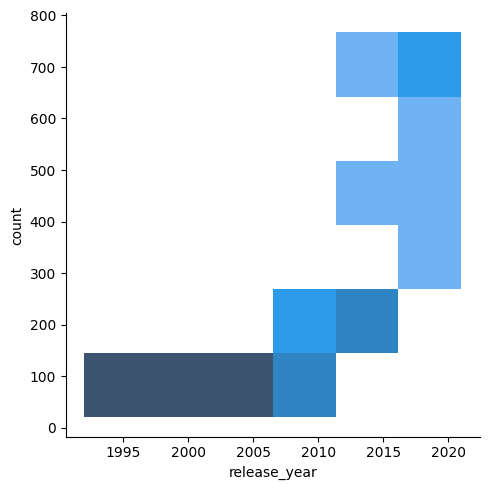

In [49]:
# number of Movies released per year in the last 30 years
df_movies_release_year = pd.DataFrame(df_movies[["title", "release_year"]].copy()).drop_duplicates().sort_values(by = "release_year")
movies_per_year = pd.DataFrame(df_movies_release_year["release_year"].value_counts()).reset_index().sort_values(by = "release_year", ascending = True).reset_index().drop(["index"], axis = 1)
# I have tried this, but there seems to be some problem with the range on y-axis. Seeked TA help as well
# but the problem remained unsolved
#sns.displot(data = movies_per_year.tail(30), x = "release_year")
#sns.displot(data = movies_per_year.tail(30), x = "release_year", y = "count", kind = "hist")
#sns.displot(data = movies_per_year.tail(30), x = "release_year", y = "count", kind = "kde")
plt.figure(figsize=(10,8))
sns.displot(data = movies_per_year.tail(30), x = "release_year", y = "count")

<Axes: xlabel='release_year', ylabel='count'>

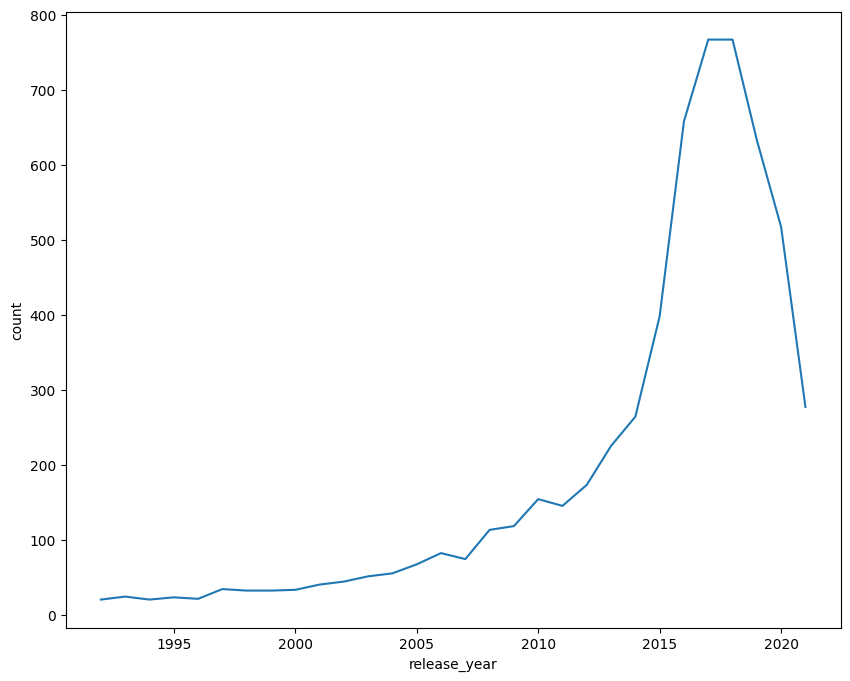

In [50]:
# the trend can be better understood using 
plt.figure(figsize=(10,8))
sns.lineplot(data = movies_per_year.tail(30), x = "release_year", y = "count")

<Figure size 1000x800 with 0 Axes>

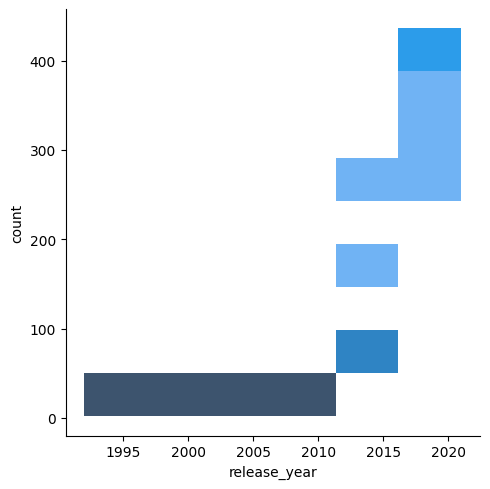

In [51]:
# number of TV Shows released per year in the last 30 years
df_tv_release_year = pd.DataFrame(df_tv[["title", "release_year"]].copy()).drop_duplicates().sort_values(by = "release_year")
tv_per_year = pd.DataFrame(df_tv_release_year["release_year"].value_counts()).reset_index().sort_values(by = "release_year", ascending = True).reset_index().drop(["index"], axis = 1)
# I have tried this, but there seems to be some problem with the range on y-axis. Seeked TA help as well
# but the problem remained unsolved
#sns.displot(data = tv_per_year.tail(30), x = "release_year")
#sns.displot(data = tv_per_year.tail(30), x = "release_year", y = "count", kind = "hist")
#sns.displot(data = tv_per_year.tail(30), x = "release_year", y = "count", kind = "kde")
plt.figure(figsize=(10,8))
sns.displot(data = tv_per_year.tail(30), x = "release_year", y = "count")

<Axes: xlabel='release_year', ylabel='count'>

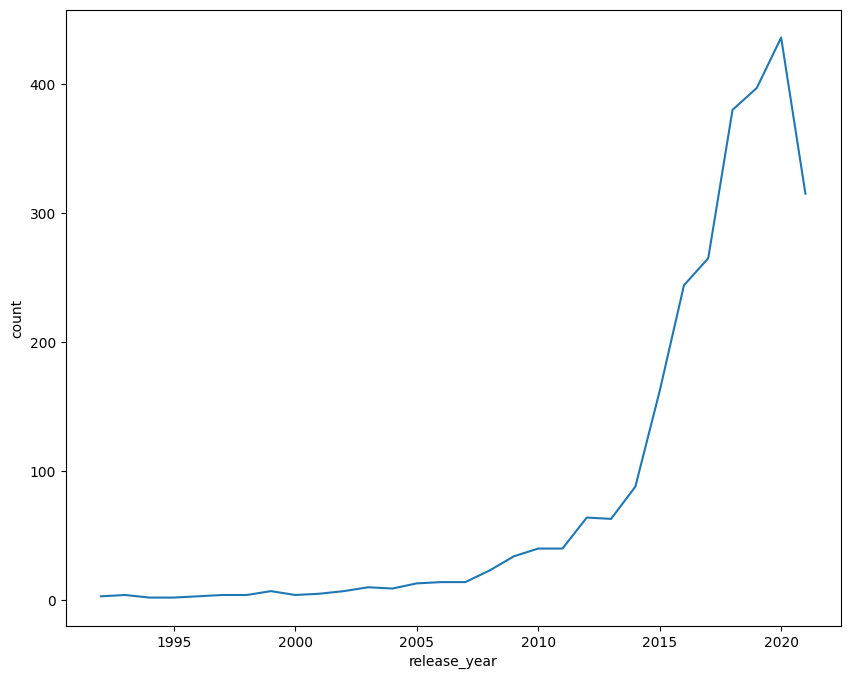

In [52]:
# the trend can be better understood using
plt.figure(figsize=(10,8))
sns.lineplot(data = tv_per_year.tail(30), x = "release_year", y = "count")

### Histplot

In [53]:
df_movies_date_added = pd.DataFrame(df_movies[["title", "date_added"]].copy()).drop_duplicates().sort_values(by = "date_added")
df_movies_date_added["month_added"] = df_movies_date_added["date_added"].dt.month
df_movies_date_added = df_movies_date_added.sort_values(by = "month_added")
movies_per_month = pd.DataFrame(df_movies_date_added["month_added"].value_counts()).sort_values(by = "month_added", ascending = True).reset_index()
movies_per_month

,month_added,count
0,1,546
1,2,382
2,3,529
3,4,550
4,5,439
5,6,492
6,7,565
7,8,519
8,9,519
9,10,545


In [54]:
df_tv_date_added = pd.DataFrame(df_tv[["title", "date_added"]].copy()).drop_duplicates().sort_values(by = "date_added")
df_tv_date_added["month_added"] = df_tv_date_added["date_added"].dt.month
df_tv_date_added = df_tv_date_added.sort_values(by = "month_added")
tv_per_month = pd.DataFrame(df_tv_date_added["month_added"].value_counts()).sort_values(by = "month_added", ascending = True).reset_index()
tv_per_month

,month_added,count
0,1.0,192
1,2.0,181
2,3.0,213
3,4.0,214
4,5.0,193
5,6.0,236
6,7.0,262
7,8.0,236
8,9.0,251
9,10.0,215


<Axes: xlabel='month_added', ylabel='Count'>

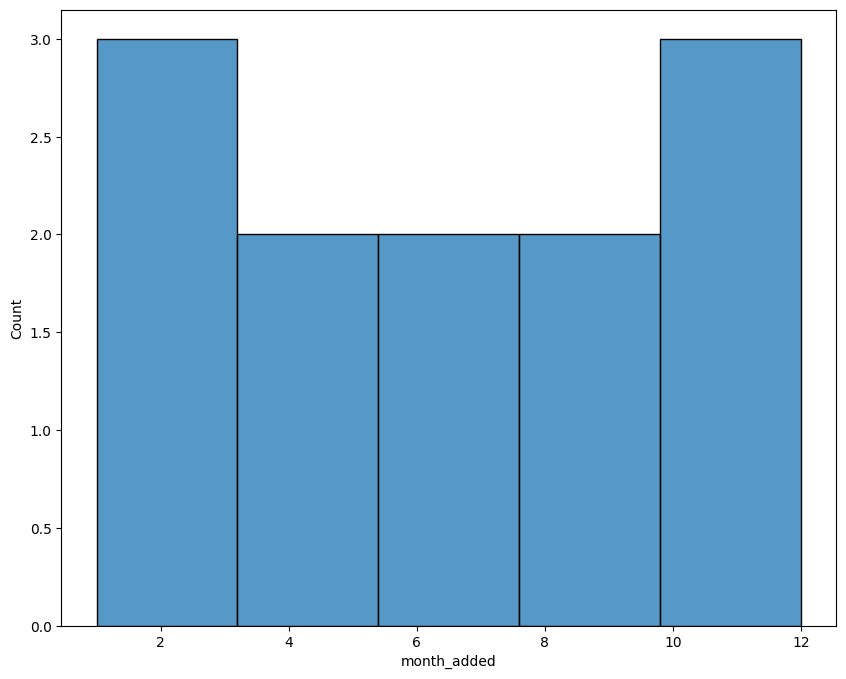

In [55]:
# I have tried this, but there seems to be some problem with the range on y-axis. Seeked TA help as well
# but the problem remained unsolved
plt.figure(figsize=(10,8))
sns.histplot(x="month_added", data=movies_per_month)

<Axes: xlabel='month_added', ylabel='count'>

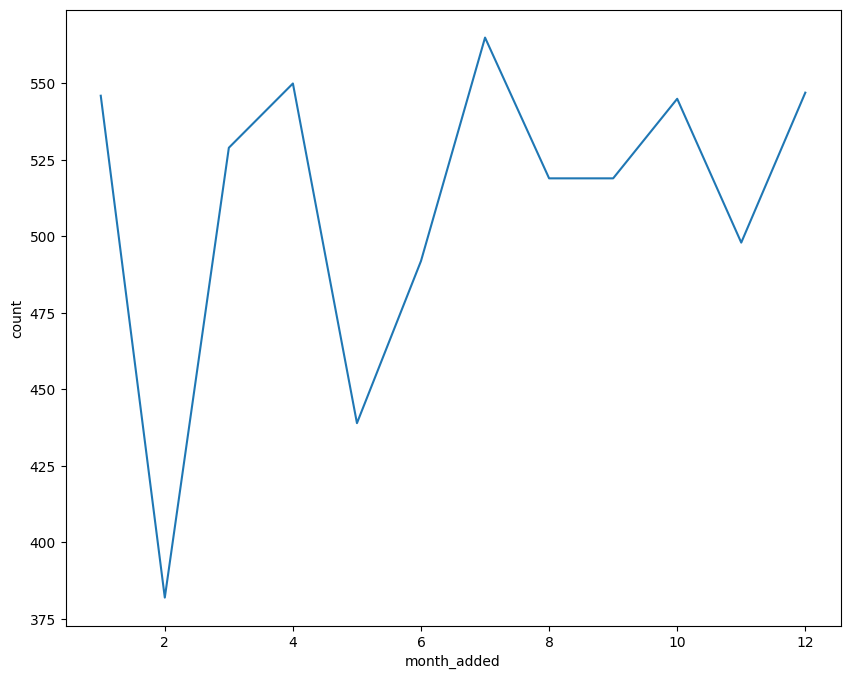

In [56]:
# the trend can be better understood using
plt.figure(figsize=(10,8))
sns.lineplot(data = movies_per_month, x = "month_added", y = "count")

<Axes: xlabel='month_added', ylabel='Count'>

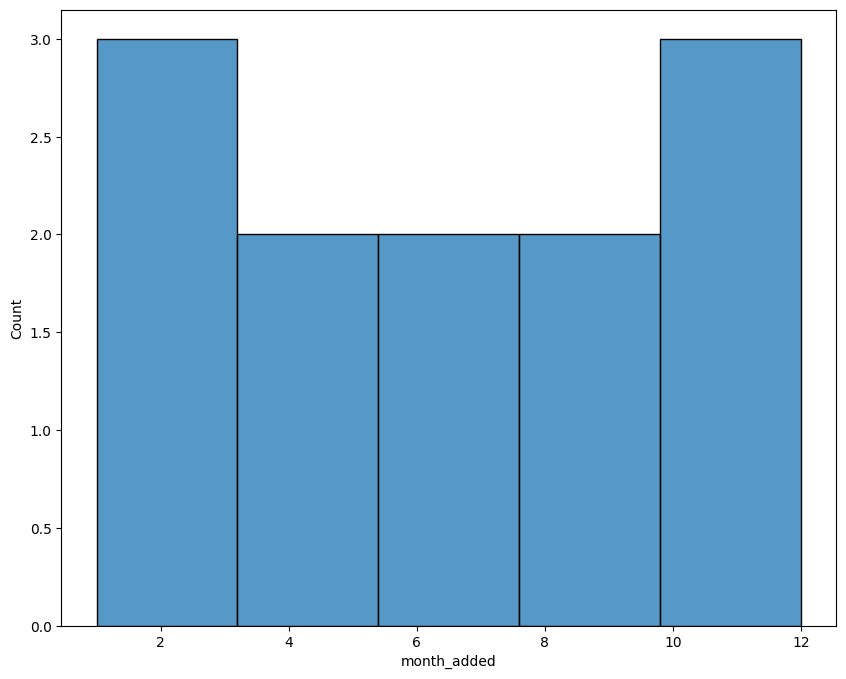

In [57]:
# I have tried this, but there seems to be some problem with the range on y-axis. Seeked TA help as well
# but the problem remained unsolved
plt.figure(figsize=(10,8))
sns.histplot(x="month_added", data=tv_per_month)

<Axes: xlabel='month_added', ylabel='count'>

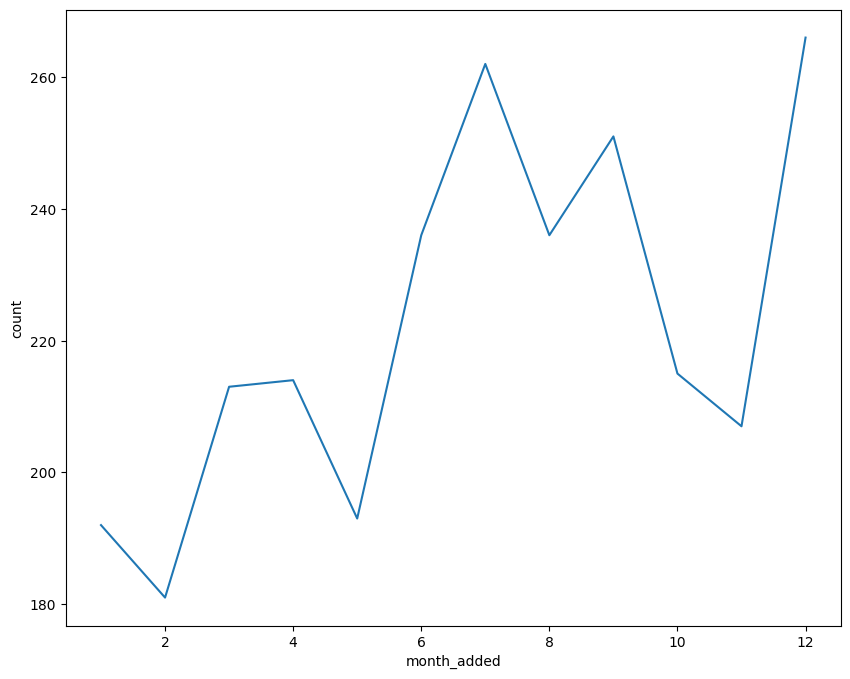

In [58]:
# the trend can be better understood using
plt.figure(figsize=(10,8))
sns.lineplot(data = tv_per_month, x = "month_added", y = "count")

### 4.2 For categorical variable(s): Boxplot

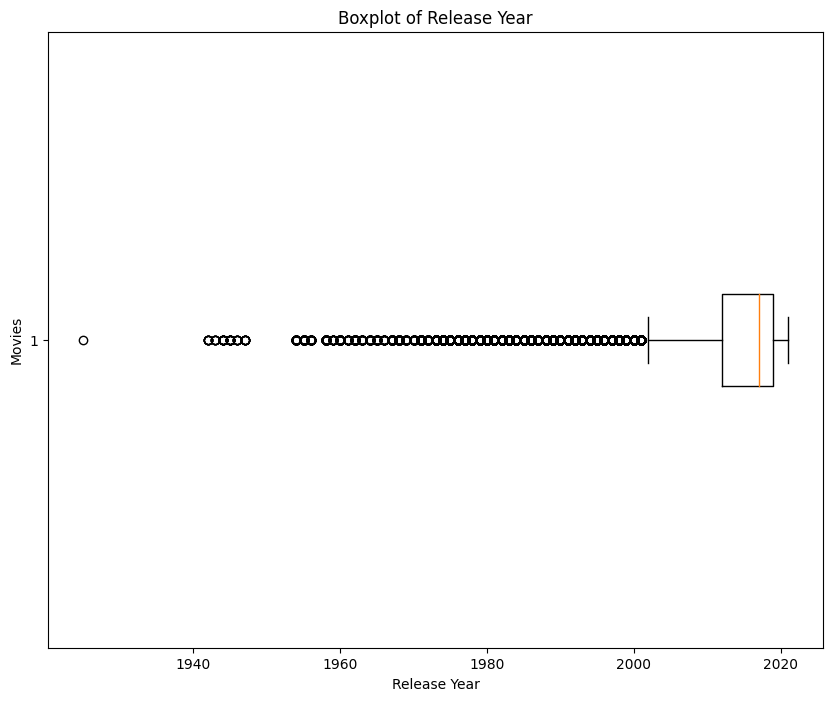

In [59]:
# boxplot for release_rate for movies and tv shows
plt.figure(figsize=(10, 8))
plt.boxplot(df_new['release_year'], vert=False)
plt.xlabel('Release Year')
plt.ylabel('Movies')
plt.title('Boxplot of Release Year')
plt.show()

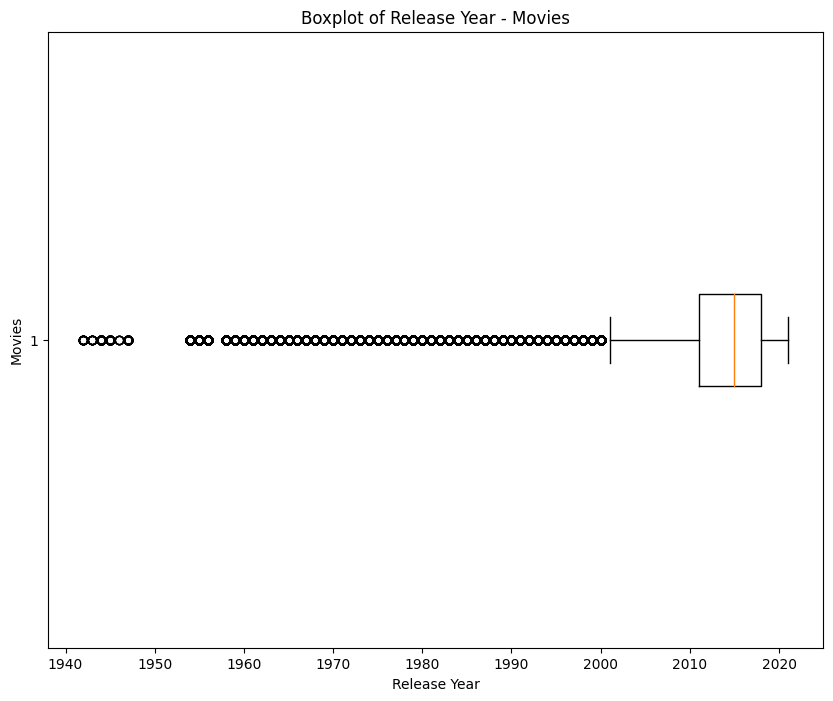

In [60]:
# boxplot for release_rate for movies
plt.figure(figsize=(10, 8))
plt.boxplot(df_movies['release_year'], vert=False)
plt.xlabel('Release Year')
plt.ylabel('Movies')
plt.title('Boxplot of Release Year - Movies')
plt.show()

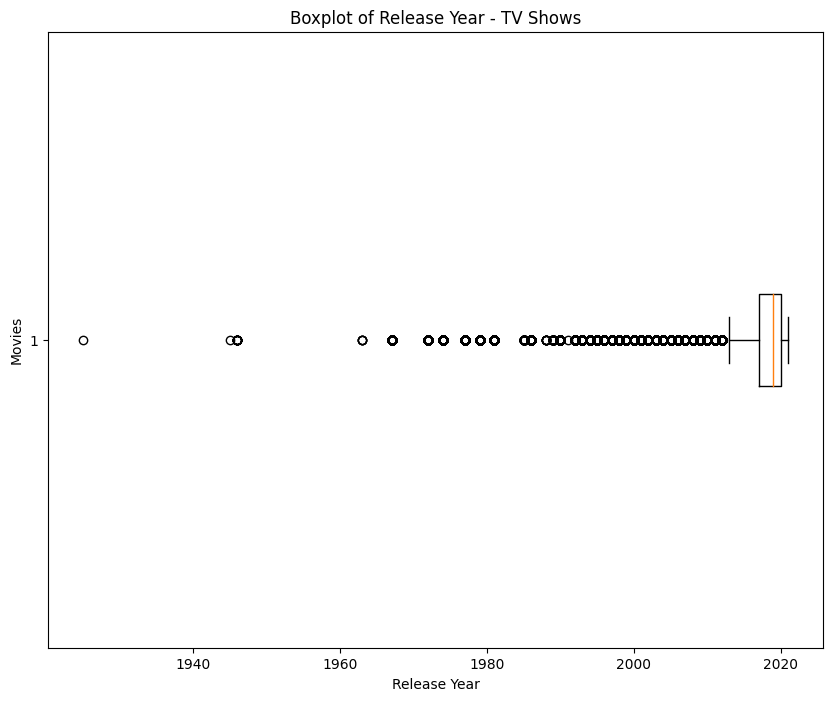

In [61]:
# boxplot for release_rate for tv shows
plt.figure(figsize=(10, 8))
plt.boxplot(df_tv['release_year'], vert=False)
plt.xlabel('Release Year')
plt.ylabel('Movies')
plt.title('Boxplot of Release Year - TV Shows')
plt.show()

### 4.3 For correlation: Heatmaps, Pairplots

### Pairplot

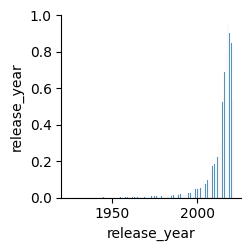

In [62]:
df_new_pairplot = pd.DataFrame(df_new[["release_year", "rating"]].copy())
sns.pairplot(df_new_pairplot)
plt.show()

### Heatmaps

Text(0.5, 1.0, 'Count of Movies by Rating and Release Year')

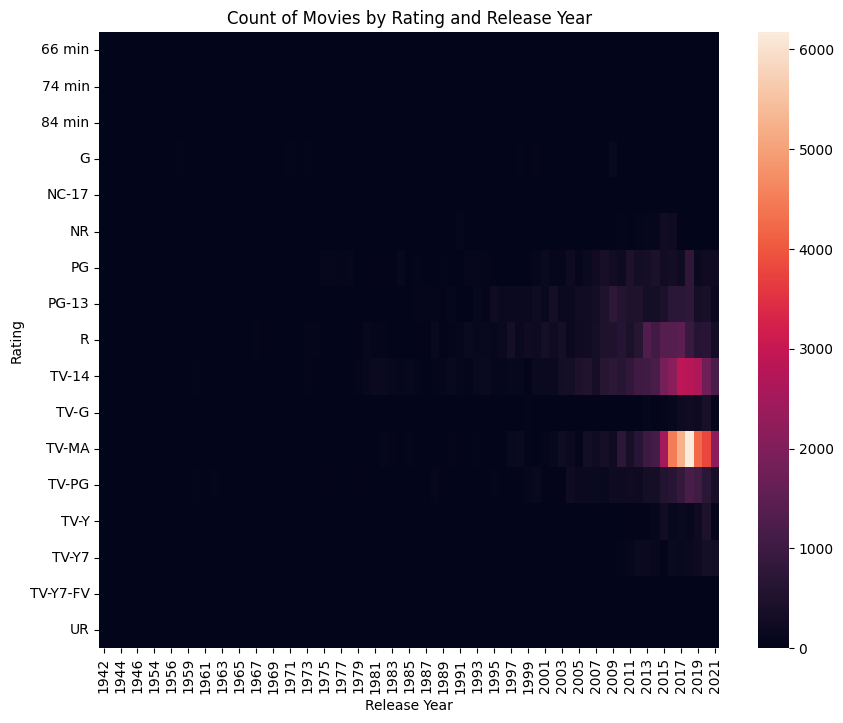

In [63]:
df_movies_new = df_movies.dropna(subset=["duration_in_min"]).drop_duplicates()
pivot_table_movies = df_movies_new.pivot_table(index='rating', columns='release_year', values='duration_in_min', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_movies)
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Count of Movies by Rating and Release Year')

Text(0.5, 1.0, 'Count of TV Shows by Rating and Release Year')

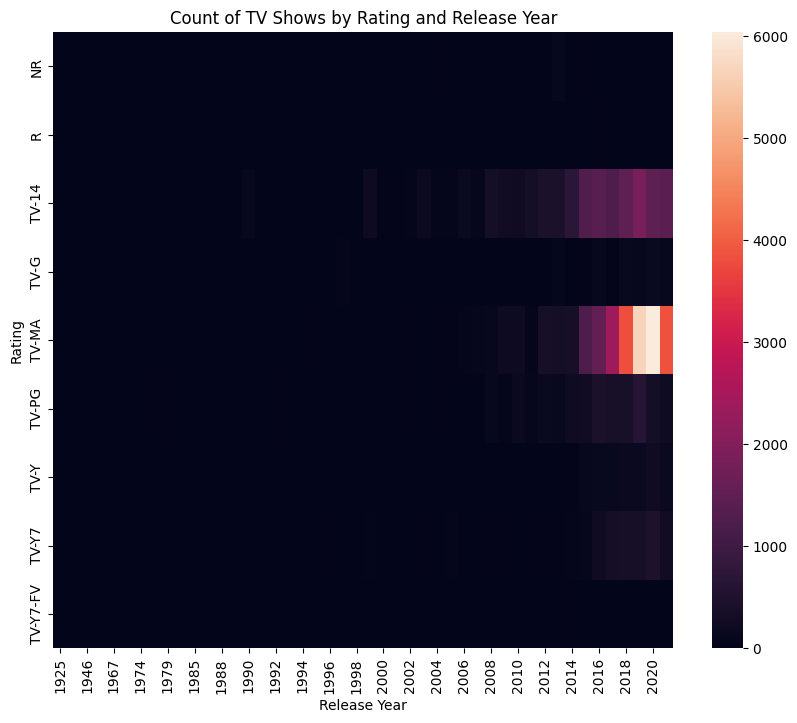

In [64]:
df_tv_new = df_tv.dropna(subset=["duration_in_seasons"]).drop_duplicates()
pivot_table_tv = df_tv_new.pivot_table(index='rating', columns='release_year', values='duration_in_seasons', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_tv)
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Count of TV Shows by Rating and Release Year')

# 5. Missing Value & Outlier check

### Missing Values

In [65]:
missing_values = df_new.isna().sum()
print(f"Missing Values : \n\n{missing_values}")

Missing Values : 

title             0
cast              0
directors         0
country           0
genre             0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64


### Outliers 

In [66]:
outliers = {}
for column in df_new.columns:
    if df_new[column].dtype != object:
        mean = df_new[column].mean()
        std = df_new[column].std()
        column_outliers = df_new[(np.abs(df_new[column] - mean) > 3 * std)]
        outliers[column] = column_outliers
print("Outliers:")
for column, column_outliers in outliers.items():
    print(f"{column} Outliers:\n{column_outliers}\n")

Outliers:
date_added Outliers:
                                                    title            cast   
110465  BoJack Horseman Christmas Special: Sabrina's C...     Will Arnett  \
110466  BoJack Horseman Christmas Special: Sabrina's C...      Aaron Paul   
110467  BoJack Horseman Christmas Special: Sabrina's C...     Alison Brie   
110468  BoJack Horseman Christmas Special: Sabrina's C...    Adam Conover   
110469  BoJack Horseman Christmas Special: Sabrina's C...  Kristen Schaal   
...                                                   ...             ...   
159457                                              Weeds     Andy Milder   
159458                                              Weeds    Tonye Patano   
159459                                              Weeds    Tonye Patano   
159460                                              Weeds    Romany Malco   
159461                                              Weeds    Romany Malco   

       directors        country        genre

The total number of outliers in the date_added column = 738

The total number of outliers in the release_year column = 4601

# 6. Insights based on Non-Graphical and Visual Analysis

### 6.1 Comments on the range of attributes 
### and
### 6.2 Comments on the distribution of the variables and relationship between them

1. 
The original DataFrame "df" contains 12 columns, out of which 11 columns are of object datatype and 1 column is of int datatype.
The cleaned DataFrame "df_new" contains 12 columns, out of which 8 columns are of object datatype, 1 column is of int data type and 1 column is of datetime type.

2. The range of the data is for the TV Shows and Movies that were added to Netflix platform from 2008/01/01 to 2021-09-25.
[Refer line 31 in this notebook]

3. 
The oldest Movie available on Netflix was released in the year 1942.
The newest Movie available on Netflix was released in the year 2021.
Total number of Movies available are 6131
[Refer line 32 in this notebook]

4.
The oldest TV Shows available on Netflix was released in the year 1925.
The newest TV Shows available on Netflix was released in the year 2021.
Total number of TV Shows available are 2676.
[Refer line 33 in this notebook]

5.
The total number of actors are 36440
The number of actors who have acted in Movies are 25952
The number of actors who have acted in TV shows are 14864
[Refer line 34 in this notebook]

6.
The total number of directors are 4994
The number of directors who have directed Movies are 4778
The number of directors who have directed TV shows are 300
[Refer line 35 in this notebook]

7.
Total number of Genres are 42
Total number of genres in Movies are 20
Total number of genres in TV Shows are 22
[Refer line 36 in this notebook]

8.
Number of different ratings are 17
Number of different ratings that Movies are available in are 17
Number of different ratings that Movies are available in are 9
[Refer line 37 in this notebook]

9.
Total number of countries that content is available in are 90
Total number of countries that Movie content is available in are 83
Total number of countries that Movie content is available in are 60
[Refer line 38 in this notebook]

10. 
Anupam Kher has starred in the most number of Movies according to the analysis.
Takahiro Sakurai has starred in most number of TV Shows according to the analysis.
[Refer line 39 and 40 in this notebook]

11. 
Rajiv Chilaka has directed most number of Movies.
Ken Burns has directed most number of TV Shows.
[Refer line 41 and 42 in the notebook]

12. 
International Movies is the top genre in Movies.
International TV Shows is the top genre in TV Shows.
[Refer line 43 and 44 in this notebook]

13. 
TV-MA rating has the highest number of Movies.
TV-MA rating has the highest number of TV Shows.
[Refer line 45 and 46 in this notebook]

14. 
United States has the highest number of Movies and TV Shows available for streaming. 
[Refer line 47 and 48 in this notebook]

### 6.3 Comments for each univariate and bivariate plot

IMPORTANT:
[While plotting the distplot and the histplot, I had encountered a problem, which even after consulting with the TA was not solved, hence
for analysis purpose I have plotted the same using a lineplot (Refer lines from 49 to 58), the reference in the following line also ask you to look at the 
line where lineplots were generated. But please do, look at the lines were I have tried to plot the distplot and histplot, I would really like to know why it
does not seem to function as required.]

1. Distplot Analysis:
From the analysis done from the plot [Refer lines 49-50], it is understood that in the last 30 years the number of Movies released has risen
exponentially until 2020. There is a downward trend obeserve post 2020, this analysis can be linked with the COVID-19 pandemic.

From the analysis done from the plot [Refer lines 51-52], it is understood that in the last 30 years the number of TV Shows released has risen
exponentially until 2020. There is a downward trend obeserve post 2020, this analysis can be linked with the COVID-19 pandemic.

2. Histplot Analysis:
From the analysis done from the plot for movies [Refer lines 55-56], it can be deduced that most number of Movies have been added to Netflix in the month of August, and the least number of movies were added to Netflix in the month of February.

From the analysis done from the plot for TV Shows [Refer lines 57-58], it can be deduced that most number of TV Shows have been added to Netflix in the month
of December, and the least number of TV Shows were added to Netflix in the month of February.

3. Boxplot Analysis:
From the analysis done from the boxplot for Movies and TV Shows [Refer line 59], it can be deduced that the highest density of content that was released
for both Movies and TV Shows is concentrated in 2019, meaning most content was release around this time.

From the analysis done from the boxplot for Movies [Refer line 60], it can be deduced that the highest density of content that was released
for both Movies and TV Shows is concentrated in 2015, meaning most content was release around this time.

From the analysis done from the boxplot for TV Shows [Refer line 61], it can be deduced that the highest density of content that was released
for both Movies and TV Shows is concentrated in 2020, meaning most content was release around this time.

4. Pairplot Analysis:
From the analysis done from the pairplot [Refer line 62], it can be deduced that most of the content that was released for different rating,
was released around the year 2020.

5. Heatmap Analysis:
From the analysis done from the heatmap for movies [Refer line 63], it is understood that the highest number of movies that were released, were released
between the years 2017 and 2019 and the popular rating of the movies was TV-MA.

From the analysis done from the heatmap for TV Shows [Refer line 64], it is understood that the highest number of movies that were released, were released
between the years 2018 and 2020 and the popular rating of the movies was TV-MA.

# 7. Business Insights

1. 2020 was the year were most number of Movies and TV Shows were released.

2. August was the month were most number of Movies were added to Netflix.

3. December was the month were most of the TV Shows were added to Netflix.

4. February was the month were least number of Movies and TV Shows were added to Netflix.

5. TV-MA is the popular rating in which most of the Movies and TV Shows were released in.

6. International Movies is the most popular genre in which the Movies were released in.

7. Internaltional TV Shows is the most popular genre in which the TV Shows were released in.

8. United States is the country were most number of Movies and TV Shows can be watched in.

9. Anupam Kher has starred in most number of Movies, and Takahira Sakurai has starred in most number of TV Shows.

10. Rajiv Chilaka has directed most number of Movies, and Ken Burns has directed most number of TV Shows.

# 8. Recommendations

1. Cosnsidering the analysis made, August seems to be the best month to add a Movie to Netflix, and December seems to be the best month to add a TV Show to Netflix.
2. February seems to be an unpopular month for both Movies and TV Shows to be added to Netflix.
3. International Movies genre seems to be the most popular genre for Movies.
4. International TV Shows genre seems to be the most popular genre for TV Shows.
5. Drama and Comedy also seems to be a popular genre for both Movies and TV Shows.
6. TV-MA seems to be the popular rating in which both Movies and TV Shows are released in, which can be suggested as the area of focus for upcoming releases. TV-14 could also be another such rating were releases can be focussed.